In [1]:
import numpy as np

In [2]:
import pandas as pd

In [60]:
from glob import glob
import os

In [61]:
fig_dir = "/Users/teliov/TUD/Thesis/Medvice/Notebooks/data/07_27_reports/misc"

In [6]:
nb_files = sorted(glob("/Users/teliov/TUD/Thesis/Medvice/Notebooks/data/07_27_reports/inc_symptoms/nb/inc*.csv"))

In [12]:
rf_files = nb_files = sorted(glob("/Users/teliov/TUD/Thesis/Medvice/Notebooks/data/07_27_reports/inc_symptoms/rf/inc*.csv"))

In [36]:
nb_precision_train = []
nb_precision_test = []
nb_accuracy_train = []
nb_accuracy_test = []
nb_top_5_train = []
nb_top_5_test = []

In [37]:
for file in nb_files:
    df = pd.read_csv(file)
    avg = df[df.train_size==1.0].groupby('fold_num').mean().loc[5]
    nb_precision_train.append(avg.precision_weighted_train_score)
    nb_precision_test.append(avg.precision_weighted_test_score)
    nb_accuracy_train.append(avg.accuracy_train_score)
    nb_accuracy_test.append(avg.accuracy_test_score)
    nb_top_5_train.append(avg.top_5_train_score)
    nb_top_5_test.append(avg.top_5_test_score)

In [38]:
rf_precision_train = []
rf_precision_test = []
rf_accuracy_train = []
rf_accuracy_test = []
rf_top_5_train = []
rf_top_5_test = []

In [39]:
for file in rf_files:
    df = pd.read_csv(file)
    avg = df[df.train_size==1.0].groupby('fold_num').mean().loc[5]
    rf_precision_train.append(avg.precision_weighted_train_score)
    rf_precision_test.append(avg.precision_weighted_test_score)
    rf_accuracy_train.append(avg.accuracy_train_score)
    rf_accuracy_test.append(avg.accuracy_test_score)
    rf_top_5_train.append(avg.top_5_train_score)
    rf_top_5_test.append(avg.top_5_test_score)

In [24]:
import matplotlib.pyplot as plt

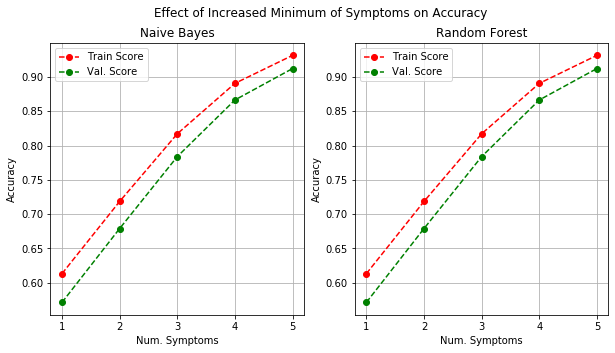

In [69]:
# accuracy plots
fig, ax = plt.subplots(1, 2)
ax[0].grid()
ax[1].grid()
ax[0].plot(range(1, 6), nb_accuracy_train, 'o--', color="r", label="Train Score")
ax[0].plot(range(1, 6), nb_accuracy_test, 'o--', color="g", label="Val. Score")
ax[1].plot(range(1, 6), rf_accuracy_train, 'o--', color="r", label="Train Score")
ax[1].plot(range(1, 6), rf_accuracy_test, 'o--', color="g", label="Val. Score")

for idx in range(2):
    #ax[idx].set_yticks(np.arange(0, 1, 0.1))
    ax[idx].set_xlabel("Num. Symptoms")
    ax[idx].set_ylabel("Accuracy")
    ax[idx].legend(loc='best')

ax[0].set_title("Naive Bayes")
ax[1].set_title("Random Forest")

fig.suptitle("Effect of Increased Minimum of Symptoms on Accuracy")
fig.set_size_inches(10, 5)
fig.savefig(os.path.join(fig_dir, "inc_symp_accuracy.png"))

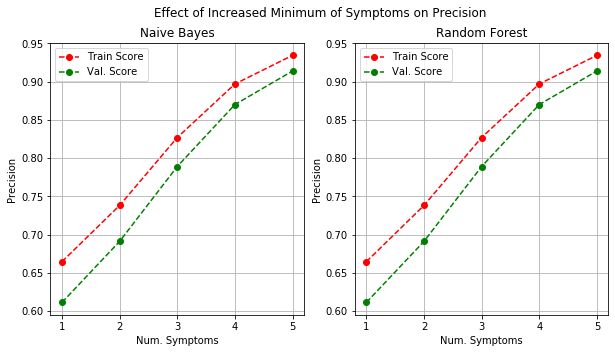

In [68]:
# precision plots
fig, ax = plt.subplots(1, 2)
ax[0].grid()
ax[1].grid()
ax[0].plot(range(1, 6), nb_precision_train, 'o--', color="r", label="Train Score")
ax[0].plot(range(1, 6), nb_precision_test, 'o--', color="g", label="Val. Score")
ax[1].plot(range(1, 6), rf_precision_train, 'o--', color="r", label="Train Score")
ax[1].plot(range(1, 6), rf_precision_test, 'o--', color="g", label="Val. Score")

for idx in range(2):
    #ax[idx].set_yticks(np.arange(0, 1, 0.1))
    ax[idx].set_xlabel("Num. Symptoms")
    ax[idx].set_ylabel("Precision")
    ax[idx].legend(loc='best')

ax[0].set_title("Naive Bayes")
ax[1].set_title("Random Forest")

fig.suptitle("Effect of Increased Minimum of Symptoms on Precision")
fig.set_size_inches(10, 5)
fig.savefig(os.path.join(fig_dir, "inc_symp_precision.png"))

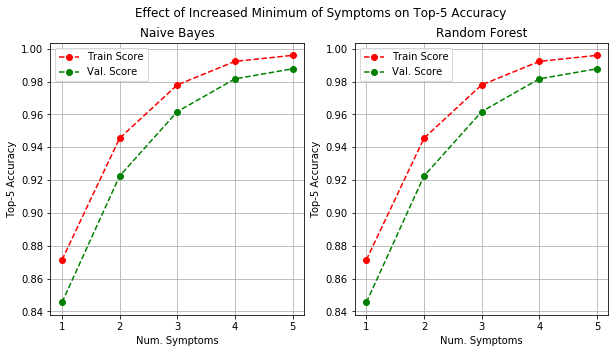

In [67]:
# top-5 plots
fig, ax = plt.subplots(1, 2)
ax[0].grid()
ax[1].grid()
ax[0].plot(range(1, 6), nb_top_5_train, 'o--', color="r", label="Train Score")
ax[0].plot(range(1, 6), nb_top_5_test, 'o--', color="g", label="Val. Score")
ax[1].plot(range(1, 6), rf_top_5_train, 'o--', color="r", label="Train Score")
ax[1].plot(range(1, 6), rf_top_5_test, 'o--', color="g", label="Val. Score")

for idx in range(2):
    #ax[idx].set_yticks(np.arange(0, 1.2, 0.1))
    ax[idx].set_xlabel("Num. Symptoms")
    ax[idx].set_ylabel("Top-5 Accuracy")
    ax[idx].legend(loc='best')

ax[0].set_title("Naive Bayes")
ax[1].set_title("Random Forest")

fig.suptitle("Effect of Increased Minimum of Symptoms on Top-5 Accuracy")
fig.set_size_inches(10, 5)
fig.savefig(os.path.join(fig_dir, "inc_symp_top5.png"))